In [1]:
from recipe_scrapers import scrape_me
import pandas as pd
import random

authors = []
titles = []
total_times = []
yields = []
ingredients = []
instructions = []
images = []
host = []
links = []
nutrients = []
ratings = []

# scraper = scrape_me(
#     "https://www.allrecipes.com/recipe/" + str() + "/")
# print(scraper)
# random sample
# do we include things with empty fields?
count = 0
while count < 10:
    i = random.randint(0, 500000)

    print(i)
    # try:
    scraper = scrape_me(
        "https://www.allrecipes.com/recipe/" + str(i) + "/")
    title = scraper.title()
    if title == "" or title in titles:
        # i += 1
        continue
    print("found")
    titles.append(title)
    authors.append(scraper.author() if scraper.author() else "")
    total_times.append(scraper.total_time() if scraper.total_time() else "")
    yields.append(scraper.yields() if scraper.yields() else "")
    ingredients.append(scraper.ingredients() if scraper.ingredients() else "")
    instructions.append(scraper.instructions() if scraper.instructions() else "")
    images.append(scraper.image() if scraper.image() else "")
    host.append(scraper.host() if scraper.host() else "")
    nutrients.append(scraper.nutrients() if scraper.nutrients() else "")
    ratings.append(scraper.ratings() if scraper.ratings() else "")
    # i += 1
    count += 1
    # except:
    # i += 1
    # continue
    # print(titles)

print(titles)
#remove duplicates?



86417
found
138825
found
186077
314881
53881
117994
found
273801
found
438622
474001
424789
226108
216098
found
125842
28391
40125
470902
263739
found
461343
461769
109862
294465
369419
92849
455182
8365
found
394057
205257
100442
373011
487464
374937
248863
216938
found
300507
150047
found
275978
found
['Johnsonville® Three Cheese Italian Style Chicken Sausage Skillet Pizza', 'Avocado and Mango Salad with Passion Fruit Vinaigrette', 'Rhubarb Pork Chop Bake', 'Linguine with Garlic-Butter Shrimp', "Pammy's Slow Cooker Beans", 'Easy Overnight Blueberry French Toast', 'Harvest Loaf Cake', 'Artichoke Soup', 'Lemon Zucchini and Cucumber Salad', 'Roast Chicken with Apples, Leeks, and Rosemary']


In [8]:
recipes = pd.DataFrame({
    'title': titles,
    'authors': authors,
    'total time': total_times,
    'yields': yields,
    'ingredients': ingredients,
    'instructions': instructions,
    'images': images,
    'host': host,
    'nutrients': nutrients,
    'ratings': ratings
})

recipes.to_csv('p02_recipes.csv')



In [5]:
print(len(titles))
print(len(total_times))
print(len(yields))
print(len(ingredients))
print(len(images))
print(len(host))
print(len(ratings))
print(len(nutrients))

10
10
10
10
10
10
10
10


# Exploratory Data

In [36]:
import statistics
import json
import ast

In [5]:
#load csv into dict

import csv

keys = ["id","title", "authors", "total_time", "yields", "ingredients", "instructions", "images", "host", "nutrients", "ratings"]


with open('p02_recipes.csv') as f:
    a = [{keys[i]: list(row.items())[i][1] for i in range(len(keys))} for row in csv.DictReader(f, skipinitialspace=True)]
        

In [12]:
print(a[1])

{'id': '1', 'title': 'Johnsonville® Three Cheese Italian Style Chicken Sausage Skillet Pizza', 'authors': '', 'total_time': '30', 'yields': '6 serving(s)', 'ingredients': "['1 (12 inch) pre-baked pizza crust', '1 1/2 cups shredded mozzarella cheese', '1 (14 ounce) jar pizza sauce', '1 (12 ounce) package Johnsonville® Three Cheese Italian Style Chicken Sausage, sliced', '1 (3.5 ounce) package sliced pepperoni']", 'instructions': 'Top pizza crust with cheese. Bake crust according to package directions. Meanwhile, in a 12-inch skillet, combine the pizza sauce, sausage and pepperoni. Bring to a simmer, stirring occasionally. Reduce heat to low. Cut pizza crust into squares; arrange over sausage mixture in skillet.', 'images': 'https://images.media-allrecipes.com/images/79591.png', 'host': 'allrecipes.com', 'nutrients': "{'calories': '505 calories;', 'fatContent': '23.8', 'carbohydrateContent': '43', 'proteinContent': '29.6', 'cholesterolContent': '89', 'sodiumContent': '1734'}", 'ratings':

In [18]:
titles = []
authors = []
times = []
yields= []
ingredients = []
instructions = []
images = []
nutrients = []
ratings = []

for dic in a:
    titles += [dic["title"]]
    authors += [dic["authors"]]
    times += [dic["total_time"]]
    yields += [dic["yields"]]
    ingredients += [dic["ingredients"]]
    instructions += [dic["instructions"]]
    images += [dic["images"]]
    nutrients += [dic["nutrients"]]
    ratings += [dic["ratings"]]
    
print(authors[9], len(authors))

Victoria M.H. 100


In [19]:
#percentage of recipies with and without authors
wth = len([item for item in authors if item != ''])/len(authors)
wthout = 1 - wth
print("With authors: ", wth, "Without authors: ", wthout)

With authors:  0.65 Without authors:  0.35


In [21]:
#mean and median and sd total time, ignoring empties
times_no_emp = [int(item) for item in times if item]
mn = statistics.mean(times_no_emp)
mdn = statistics.median(times_no_emp)
sd = statistics.stdev(times_no_emp)

print("Total time (in mins): \nMean: ", mn, "\nMedian: ", mdn, "\nStd dev: ", sd)

Total time (in mins): 
Mean:  86.17045454545455 
Median:  50.0 
Std dev:  118.90904682101764


In [23]:
#percentage recipies withtout ratings
wth_r = len([item for item in ratings if item != ''])/len(ratings)
wthout_r = 1 - wth_r
print("With ratings: ", wth_r, "Without ratings: ", wthout_r)

With ratings:  0.81 Without ratings:  0.18999999999999995


In [25]:
#mean median sd recipie rating

ratings_no_emp = [float(item) for item in ratings if item]
mn_r = statistics.mean(ratings_no_emp)
mdn_r = statistics.median(ratings_no_emp)
sd_r = statistics.stdev(ratings_no_emp)

print("Ratings (out of 5): \nMean: ", mn_r, "\nMedian: ", mdn_r, "\nStd dev: ", sd_r)

Ratings (out of 5): 
Mean:  3.5308641975308643 
Median:  4.19 
Std dev:  1.8357874315473348


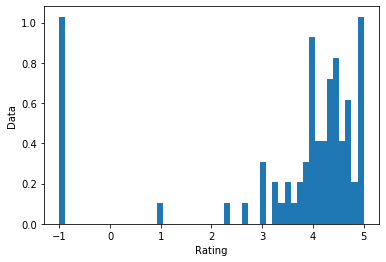

In [43]:
#graph distribution of ratings
import matplotlib.pyplot as plt
import numpy as np

plt.hist(ratings_no_emp, density=True, bins=50)
plt.ylabel('Data')
plt.xlabel('Rating')
plt.show()

In [39]:
#max num ingredients, min, mean
ingredients_2 = [[n.strip() for n in ast.literal_eval(x)] for x in ingredients]
num_ingredients = [len(x) for x in ingredients_2]
max_l = max(num_ingredients)
min_l = min(num_ingredients)
mean_l = statistics.mean(num_ingredients)

print("Num Ingredeints: \nMean: ", mean_l, "\nMax: ", max_l, "\nMin: ", min_l)

Num Ingredeints: 
Mean:  8.84 
Max:  24 
Min:  2


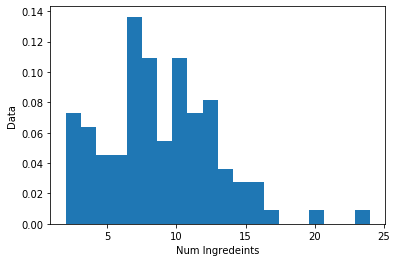

In [44]:
#graph number of ingredients
import matplotlib.pyplot as plt
import numpy as np

plt.hist(num_ingredients, density=True, bins=20)
plt.ylabel('Data')
plt.xlabel('Num Ingredeints')
plt.show()